BAULIER Nils

KABLY Salma

VIARD Raphaël

WEISSBERG Simon

supervisé par VAES Urbain

# Introduction

Historiquement, les processus de régression gaussienne furent introduits par Krige en 1960, cherchant à l’époque à obtenir la distribution d’or dans un milieu, en ne se basant que sur des échantillons. Aujourd’hui, ils permettent par exemple d’étudier la perméabilité radioactive d’un sol. L'approche de résolution d'équations aux dérivées partielles par processus gaussien est une technique d'approximation de la solution par une fonction ayant un caractère aléatoire, permettant par exemple de modéliser l'incertitude sur une donnée du problème. Avant de se lancer dans une telle résolution, il parait naturel d'abord de simplement essayer d'approcher une fonction connue par un processus gaussien (c'est la régression gaussienne), ce qui sera l'objet principal de ce premier rendu. Cette première étape nous orientera pour ensuite résoudre des équations différentielles linéaires.

## Processus gaussien

**Définition** Un **processus stochastique** est une famille de variables aléatoires $({X_t})_{t \in T}$ définies sur le même espace de probabilité $(\Omega,\mathcal{F},\mathcal{P})$ indexée par $T$ et à valeurs dans $S$. Un processus stochastique peut donc aussi être vu comme une application $X:\Omega \times T \to S$ tel que 
pour tout $t$ dans $T$, $X( . ,t)$ est une variable aléatoire.

Un **processus gaussien** est un processus stochastique $({X_t})_{t \in T}$ tel que $\forall n \in \mathbb{N}, \forall (t_1,t_2,...,t_n) \in T^{n}, (X_{t_1},...,X_{t_n})$ est un vecteur gaussien.

**Propriété** Soit $({X_t})_{t \in T}$ un processus gaussien. Alors il existe $\bar{m}:T \to \mathbb{R}$ et $\bar{k}:T \times T \to \mathbb{R}$ définie positive tel que $\forall n \in \mathbb{N}, \forall (t_1,t_2,...,t_n) \in T^{n}, (X_{t_1},...,X_{t_n}) \sim \mathcal{N}( (\bar{m}(t_1) , ... , \bar{m}(t_n))^\top , K_{t_1,t_2,...,t_n} )$ où $K_{t_1,t_2,...,t_n}$ est la matrice de coefficients $K_{i,j}=\bar{k}(t_i,t_j)$.
Réciproquement, s'il existe un tel m et un tel c, alors $({X_t})_{t \in T}$ est un processus gaussien. On note alors $({X_t})_{t \in T} \sim \mathcal{GP}(\bar{m},\bar{k})$ et on appelle $\bar{m}$ la fonction moyenne et $\bar{k}$ le noyau de covariance du processus gaussien.

## Modéliser un processus gaussien

Voici un algorithme qui produit des tirages de trajectoires indépendantes d'un processus gaussien

In [1]:
import Plots # Bibliothèque pour afficher les courbes
using LinearAlgebra #Faire de l'algèbre linéaire.

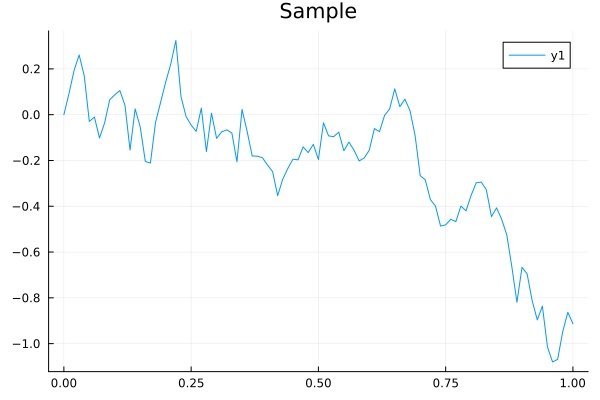

In [2]:
T=0:0.01:1 #Ensemble de valeurs de 0 à 1 avec pas de 0.01
gamma=1
sigma=0.2

m(x)=0 #Définie une fonction.
c(x,t)=exp(-(x-t)^2/gamma^2)
c2(x,y)=min(x,y)

A=zeros(101,101) #crée matrice avec 0 partout

A=c2.(T,T') # T' est la transposée de T. Cette commande donne Aij=c2TiTj

sqrtA=sqrt(A)
Plots.plot(title="Sample")
X=randn(101) #Génére 101 tirages d'une loi normale centrée réduite.
Y=sqrtA*X
Plots.plot!(T,Y)


Voici une fonction généralisant cet algorithme. Ici, k représente le noyau de covariance du processus, m sa moyenne, T l'ensemble fini sur lequel on modélise et n le nombre de tirage.

In [3]:
function GPsample(k,m,X,n)
    Plots.plot(title="GPsample")
    m_X=m.(X')
    k_XX=k.(X,X')
    R=real(sqrt(k_XX))
    for i=1:n
        u=randn(size(X))
        f_X=m_X'+R*u
        Plots.plot!(X,f_X)
    end
    K=zeros(length(X))
    for i=1:length(X)
        K[i]=k_XX[i,i]
    end
    Plots.plot!(X,m_X',label="Moyenne",linewidth=3)
end

GPsample (generic function with 1 method)

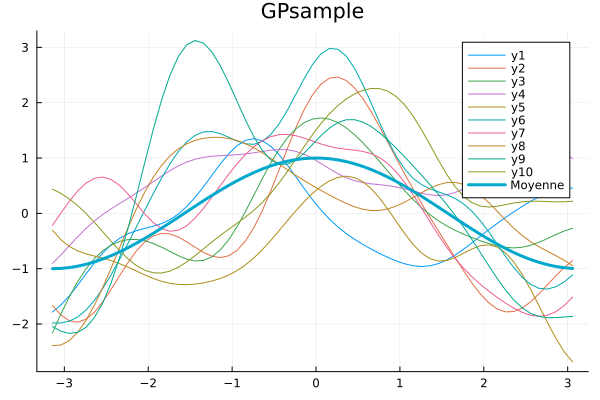

In [4]:
T=-π:0.1:π
gamma=1
sigma=0
m(x)=0 #Définie une fonction.
m1(x)=cos(x)
c(x,t)=exp(-(x-t)^2/gamma^2)
c2(x,y)=min(x,y)
GPsample(c,m1,T,10)

# Interpoler un ensemble de points par un processus gaussien.

## Régression gaussienne

***Problème de la régression*** Décrivons le problème et posons les notations. Soit $\chi$ un ensemble non vide et $f:\chi\to\mathbb{R}$ une fonction. Soit $n\in\mathbb{N}$ et $(x_i,y_i)_{i=1}^n\subset\chi\times\mathbb{R}$ tel que
$$ ~~ y_i=f(x_i)+\xi_i,~~~~~~~~i=1,...n$$ 
Les $(x_i,y_i)$ sont les points que l'on cherche à interpoler et les $\xi_i$ sont des variables aléatoires qui représentent le "bruit", ou alors l'incertitude/variabilité des réponses que l'on peut avoir pour une même entrée.

Le problème de la régression est d'estimer la fonction f en se basant $(*)$. La fonction $f$ est alors appelée fonction de régression.

***Régression gaussienne*** On impose ici $f\sim\mathcal{GP}(m,k)$ et $\xi_i\sim\mathcal{N}(0,\sigma^2),~~~~i=1,...,n$. Ici, $m$ et $k$ doivent être choisis de manière à représenter des connaissances ou des hypothèses sur la fonction de régression.

***Lemme*** Soit $a\in\mathbb{R}^d$ et $b\in\mathbb{R}$ des vecteurs gaussiens tels que 
$$
\begin{bmatrix} a \\ b \end{bmatrix} \sim \mathcal{N} \begin{pmatrix} \begin{bmatrix} \mu_a \\ \mu_b \end{bmatrix} \ \begin{bmatrix} A \ C \\ C^T \ B \end{bmatrix} \end{pmatrix}
$$
où $\mu_a$ et $\mu_b$ sont les vecteurs moyennes, $A$ et $B$ les matrices de covariances et $C\in\mathbb{R}^{n\times m}$.
Alors la distribution conditionnelle de b sachant a est donnée par
$$ b|a \sim \mathcal{N}(\mu_b+C^TA^{-1}(a-\mu_a),B-C^TA^{-1}C) $$

***Théorème*** Supposons $f$ satisfaisant les points précédents. Alors
$$ f|Y\sim\mathcal{GP}(\bar{m},\bar{k}),
$$
où $\bar{m}:\chi\to\mathbb{R}$ et $\bar{k}:\chi\times\chi\to\mathbb{R}$ sont données par
$$ \bar{m}(x)=m(x)+k_{xX}(k_{XX}+\sigma^2I_n)^{-1}(Y-m_X),~~~~~~~~~~x\in\chi $$
$$ \bar{k}(x,x')=k(x,x')-k_{xX}(k_{XX}+\sigma^2I_n)^{-1}k_{Xx'}, ~~~~~ x, x'\in\chi$$
où $k_{Xx}=k_{xX}^{T}=(k(x_1,x),...,k(x_n,x))^{T}$ et $m_X^{T}=(m(x_1),...m(x_n))^{T}$

Une façon de "retrouver" ce théorême est de passer par la méthode des moindres carrés sur les espaces à noyau reproduisant.

### Espace à noyau reproduisant

***Définition (Noyaux définis positifs)*** Soit $\chi$ un ensemble non vide. Un noyau défini positif est une fonction symétrique $k : \chi \times \chi \to \mathbb{R}$ tel que $\forall n \in \mathbb{N}, (c_1,...,c_n) \in \mathbb{R}^n et (x_1,...,x_n) \in \chi^n$
$$
\sum_{i=1}^n \sum_{j=1}^n c_i c_j k(x_i,x_j) \ge 0.
$$

**Remarque** En reprenant les notations de I.a., on observe que le noyau de covariance c peut être vu comme un noyau défini positif sur $T \times T$. 

***Définition (Espace à noyau reproduisant)*** Soit $\chi$ un ensemble non vide. Un espace de Hilbert $(\mathcal{H}_k,\langle .,.\rangle_{\mathcal{H}_k})$ de fonctions de $\chi$ est appelé un espace à noyau reproduisant de noyau reproduisant $k$ si les conditions suivantes sont satisfaites :
$$
(i) \forall x\in\chi, k(.,x)\in\mathcal{H}_k;
$$
$$
(ii) \forall x\in\chi,\forall f\in\mathcal{H}_k,f(x)=\langle f,k(.,x)\rangle_{\mathcal{H}_k}
$$

**Remarque** $(ii)$ équivaut à dire que l'évaluation est continue sur l'espace des fonctions de $\mathcal{H}_k$

### Méthode des moindres carrés

Nous souhaitons interpoler l'ensemble de points ${(x_1,y_1),...,(x_n,y_n)}$.
Nous nous intéressons d'abord à résoudre le problème 
$$
\hat{f} = argmin(\frac{1}{n}\sum_{i=1}^nL(x_i,y_i,f(x_i))+\lambda\lVert f\rVert_{\mathcal{H}_k}^2 | f\in\mathcal{H}_k)
$$
où $L:\chi\times\mathbb{R}\times\mathbb{R}\to\mathbb{R}^{+}$ est une fonction de perte et $\lambda >0$ une constante de régularisation. L joue sur la différence entre les points $y_i$ et les $f(x_i)$. Nous allons ici nous intéresser à l'estimateur des moindres carrés $L(x,y,y')=(y-y')^2$ donc au problème suivant :
$$
\hat{f} = argmin(\frac{1}{n}\sum_{i=1}^n(f(x_i)-y_i)^2+\lambda\lVert f\rVert_{\mathcal{H}_k}^2 | f\in\mathcal{H}_k)
$$

***Théorème*** La solution est unique, et est donnée par
$$
\hat{f}(x)=k_{xX}(k_{XX}+n\lambda I_{n})^{-1}Y
$$

***Démonstration*** Notons $h:f\in\mathcal{H}_k\to\mathbb{R}$ la fonction $h(f)=\frac{1}{n}\sum_{i=1}^n(f(x_i)-y_i)^2+\lambda\lVert f\rVert_{\mathcal{H}_k}^2$, qu'on cherche donc à minimiser.

Posons $\mathcal{H}_0=vect(\{k(.,x_i)\}_{i=1,...,n})$. $\mathcal{H}_0$ est un sous espace vectoriel de $\mathcal{H}_k$. Ainsi, on peut considérer $\mathcal{H}_0^\perp$ supplémentaire orthogonal de $\mathcal{H}_0$. 

Soit $f^*$ solution optimale du problème. Alors il existe $f^*_0\in\mathcal{H}_0$ et $g^*\in\mathcal{H}_0^\perp$ tel que $f^*=f^*_0+g^*$

Ainsi, $\lVert f^*\rVert_{\mathcal{H}_k}^2=\lVert f^*_0\rVert_{\mathcal{H}_k}^2+\lVert g^*\rVert_{\mathcal{H}_k}^2$ (théorême de pythagore)

et $f^*(x_i)=\langle f,k(.,x_i)\rangle_{\mathcal{H}_k}=\langle f^*_0,k(.,x_i)\rangle_{\mathcal{H}_k}+\langle g^*,k(.,x_i)\rangle_{\mathcal{H}_k}=\langle f^*_0,k(.,x_i)\rangle_{\mathcal{H}_k}$ car $g^*\mathcal{H}_0^\perp$

donc finalement $h(f^*)=h(f^*_0)+\lVert g^*\rVert_{\mathcal{H}_k}^2$ où $\lVert g^*\rVert_{\mathcal{H}_k}^2 >0$ si $f^*$ n'appartient pas à $\mathcal{H}_0$, ce qui montre que $f^*_0$ est une meilleure solution au problème, ce qui n'est pas car f est par hypothèse la solution optimale de ce dernier. Donc la solution du problème si elle existe est un élément de $\mathcal{H}_0$.

Il suffit alors de résoudre le problème sur $\mathcal{H}_0$ (espace de dimension finie), ce qui aboutit à la formule annoncée.

### Lien avec processus gaussien

***Proposition*** Soit $k$ un noyau défini positif sur un ensemble $\chi$ et définissons $X:=(x_1,...,x_n)\in\chi^n$ et $Y:=(y_1,...,y_n)\in\mathbb{R}^n$. Alors $\bar{m}=\hat{f}$ si $\sigma^2=n\lambda$ où

$\bar{m}$ est la fonction moyenne de la regression gaussienne sur $(X,Y)$, le prayeur du processus gaussien $\mathcal{f}\sim\mathcal{GP}(0,k)$ en considérant le bruit $\xi_1,...,\xi_n\sim\mathcal{N}(0,\sigma^2)$

$\hat{f}$ est la solution de la régression des moindres carrées de $(X,Y)$ basé sur l'espace à noyau reproduisant associé à $k$.

Ainsi on peut interpoler un ensemble de points de la façon suivante (premier implémentation avec un ensemble à 3 points)

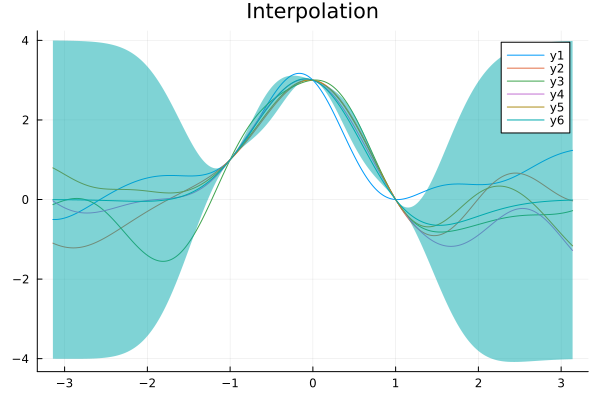

In [5]:
#Interpolation

T2=-π:0.01:π
X2=[-1 0 1]
Y2=[1 3 0]

M=zeros(size(T2))
MX=m.(X2')
KXX=c.(X2,X2') #C.(U,V) -> fait boucle tel que kXX[i,j]=c(U[i],V[j]) KXX : matrice de covariance, m : fonction moyenne
A2=zeros(length(T2),length(T2))

for i=1:length(T2)
    M[i]=m(T2[i])+( [c(T2[i],X2[1]) c(T2[i],X2[2]) c(T2[i],X2[3])]*inv(KXX+sigma^2*(Matrix(I,3,3)))*(Y2'-MX))[1]
    for j =1:length(T2)
        A2[i,j]=c(T2[i],T2[j]) - ([c(T2[i],X2[1]) c(T2[i],X2[2]) c(T2[i],X2[3])]*inv(KXX+sigma^2*(Matrix(I,3,3)))*[c(X2[1],T2[j]) c(X2[2],T2[j]) c(X2[3],T2[j])]')[1]
    end
end

sqrtA2=real(sqrt(A2))
Plots.plot(title="Interpolation")

for i=1:5
    LN=randn(size(T2))
    Y2=M+sqrtA2*LN
    Plots.plot!(T2,Y2)
end
B=zeros(length(T2))
for i=1:length(T2)
    B[i]=A2[i,i]
end
Plots.plot!(T2,M,ribbon=4*B)

Voici une fonction qui généralise l'interpolation sur un ensemble de points quelconque et à un espace T quelconque

In [6]:
function interpolation_gaussienne_discret(T,X,Y,k,m,n)
    M=zeros(length(T))
    MX=m.(X')
    KXX=k.(X,X')
    A=zeros(length(T),length(T))
    for i=1:length(T)
        J=zeros(length(X))
        for l=1:length(X)
            J[l]=(k(T[i],X[l]))
        end
        M[i]=m(T[i])+( J'*(inv(KXX+sigma^2*Matrix(I,length(X),length(X)))*(Y'-MX) ))[1]
        for j=1:length(T)
            K=zeros(length(X))
            for l=1:length(X)
                K[l]=k(X[l],T[j])
            end
            A[i,j]=k(T[i],T[j])-( J'*(inv(KXX+sigma^2*Matrix(I,length(X),length(X)))*K))[1]
        end
    end
    B=zeros(length(T))
    for i=1:length(T)
        B[i]=A[i,i]
    end
    sqrtA=real(sqrt(A))
    Plots.plot(title="Régression gaussienne")
    for i=1:n
        LN=randn(size(T))
        Y=M+sqrtA*LN
        Plots.plot!(T,Y)
    end
    Plots.plot!(T,M,ribbon=4*B,label="Moyenne",linewidth=3)
end

interpolation_gaussienne_discret (generic function with 1 method)

In [7]:
function interpolation_gaussienne(T,X,Y,k,m,n)
    k_XX=k.(X,X')
    m_X=m.(X')
    M(x)=m(x)+( k.(x,X')'*inv(k_XX+sigma^2*Matrix(I,length(X),length(X)))*(Y'-m_X))[1] # Moyenne de f conditionné sur Y
    K(x,y)=k(x,y)-( k.(x,X')'*(inv(k_XX+sigma^2*Matrix(I,length(X),length(X)))*k.(X,y)'))[1] # Covariance de f conditionné sur Y
    Plots.plot(title="Régression gaussienne")
    M_X=M.(T')
    K_XX=K.(T,T')
    R=real(sqrt(K_XX))
    C=zeros(length(T))
    for i=1:length(T)
        C[i]=K_XX[i,i]
    end
    for i=1:n
        u=randn(size(T))
        f_X=M_X'+R*u
        Plots.plot!(T,f_X)
    end
    Plots.plot!(T,M_X',ribbon=4*C,label="Moyenne",linewidth=3)
end

interpolation_gaussienne (generic function with 1 method)

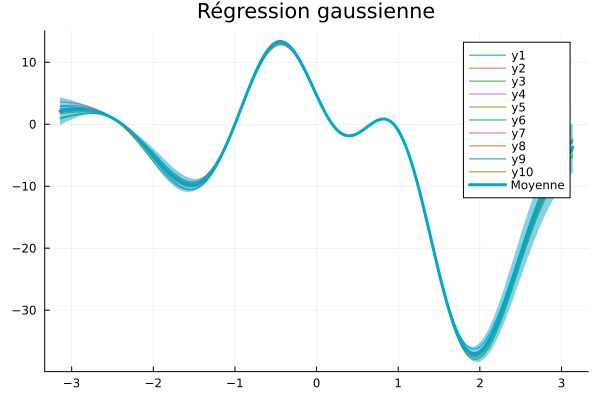

In [8]:
T2=-π:0.01:π
X2=[-2.5 -1 0.1 0.7 0.9 1]
Y2=[1 0 2 0.3 0.5 -1]

interpolation_gaussienne(T2,X2,Y2,c,m,10)

Voici une variante qui approche une fonction par une gaussienne.

In [9]:
function approximation_gaussienne(f,T,n)
    X=T[1]:1:T[end]
    Y=zeros(length(X))
    for i=1:length(X)
        Y[i]=f(X[i])
    end
    interpolation_gaussienne(T,X',Y',c,m,n)
end

approximation_gaussienne (generic function with 1 method)

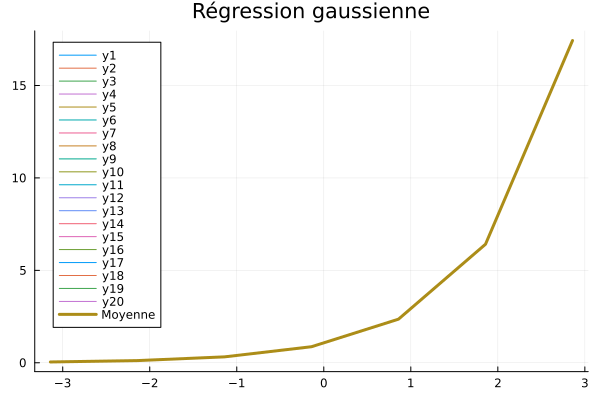

In [10]:
#Approchons exp par une gaussienne.
T2=-π:1:π
f(x)=exp(x)
approximation_gaussienne(f,T2,20)

# Application aux équations différentielles

Soit $u\sim\mathcal{GP}(m,k)$, $\mathcal{L}:\mathbb{U}\to\mathbb{R}$ un opérateur linéaire et une variable gaussienne indépendante $\epsilon \sim \mathcal{N}(\mu,\Sigma)$. Alors 
$$
u | (\mathcal{L}[u]+\epsilon=y)\sim\mathcal{GP}(m^{u|y},k^{u|y})
$$
où la moyenne et la covariance sont données par 
$$
m^{u|y}(x)=m(x)+\mathcal{L}[k(.,x)]^{T}(\mathcal{L}k\mathcal{L}+\Sigma)^{-1}(y-(\mathcal{L}[m]+\mu))
$$
$$
k^{u|y}=k(x_1,x_2)+\mathcal{L}[k(.,x_1)]^{T}(\mathcal{L}k\mathcal{L}+\Sigma)^{-1}\mathcal{L}[k(.,x_2)]
$$
où $(\mathcal{L}k\mathcal{L})_{ij}:=\mathcal{L}[x\mapsto\mathcal{L}[k(x,.)_j]_i$


Ces formules sont une généralisation de celle obtenue dans le cas de la régression gaussienne (où l'opérateur $\mathcal{L}$ était l'opérateur identité.
On va dans un premier temps essayer de résoudre l'équation de Poisson en 1 dimension.

## Equation de Poisson : $-u''=1$

In [11]:
using Symbolics
using Zygote

#On définie quelques fonctions utiles.
dx(f)=(x,y)->gradient(x->f(x,y),x)[1]
dx2(f)=dx(dx(f)) #dérivée seconde partielle de f par rapport à x
dy(f)=(x,y)->gradient(y->f(x,y),y)[1]
dy2(f)=dy(dy(f)) #dérivée seconde partielle de f par rapport à y
dx2dy2(f)=dx2(dy2(f))

dx2dy2 (generic function with 1 method)

In [ ]:
##Tentative de résolution en dérivant numériquement les fonctions, mais zygote prend beaucoup trop de temps à calculer LkL! 

T=-π:0.1:π
k(x,y)=exp(-(x-y)^2/gamma^2)
m(x)=0

#On cherche à résoudre -u''=1. Observons l'EDP sur X
g(x)=1
X=-π:1:π
Y=g.(X)
#Une matrice utile
LkL=dx2dy2(k)
N=inv(LkL.(X,X')+sigma^2*Matrix(I,length(X),length(X)))

#Moyenne de f|L[f]+epsilon=y
M(x)=m(x) - dx2(k).(x,X') * N * (Y-(-m''(x)+0))
#Noyau de covariance de f|L[f]+epsilon=y
K(x,y)=k(x,y) - dx2(k).(x,X') * N * dx2(k).(X,y)
Plots.plot(title="Solution de -u'' = 1")
M_X=M.(T')
K_XX=K.(T,T')
R=real(sqrt(K_XX))
C=zeros(length(T))
for i=1:length(T)
    C[i]=K_XX[i,i]
end
for i=1:3
    u=randn(size(T))
    f_X=M_X'+R*u
    Plots.plot!(T,f_X)
end
Plots.plot!(T,M_X',ribbon=4*C,label="Moyenne",linewidth=3)

In [11]:
function interpolation_gaussienne_poisson(T,X,Y,k,m,n)
    k_XX=k.(X,X')
    m_X=m.(X')
    M(x)=m(x)+( k.(x,X')'*inv(k_XX+sigma^2*Matrix(I,length(X),length(X)))*(Y'-m_X))[1] # Moyenne de f conditionné sur Y
    K(x,y)=k(x,y)-( k.(x,X')'*(inv(k_XX+sigma^2*Matrix(I,length(X),length(X)))*k.(X,y)'))[1] # Covariance de f conditionné sur Y
    Plots.plot(title="Résolution -u''=1")
    M_X=M.(T')
    K_XX=K.(T,T')
    R=real(sqrt(K_XX))
    C=zeros(length(T))
    for i=1:length(T)
        C[i]=K_XX[i,i]
    end
    for i=1:n
        u=randn(size(T))
        f_X=M_X'+R*u
        Plots.plot!(T,f_X)
    end
    Plots.plot!(T,M_X',ribbon=4*C,label="Moyenne",linewidth=3)
end

interpolation_gaussienne_poisson (generic function with 1 method)

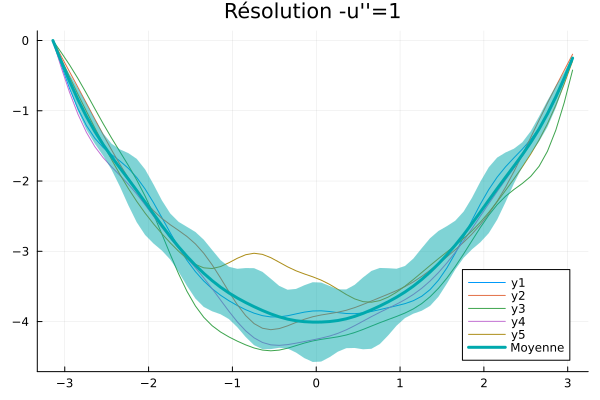

In [12]:
#Voici une version du programme où les dérivées sont calculées à la main.

#résolution de u"=-1, u(π)=u(-π)=0
T = -π:0.1:π
X = LinRange(-π,π,10)
ℓ = 0.6
g(x)=-1
Y = g.(X)
sigma = 0
#ordre des dérivées ne change rien : Schwarz
k(x, y) = exp(- (x - y)^2 / 2ℓ^2)
Lk(x, y) = - ((((2y - 2x)^2)*exp((-((x - y)^2)) / (2(ℓ^2)))) / (2(ℓ^2)) - 2exp((-((x - y)^2)) / (2(ℓ^2)))) / (2(ℓ^2))
LkL(x, y) = ((((2y - 2x)*(2x - 2y)*exp((-((x - y)^2)) / (2(ℓ^2)))) / (2(ℓ^2)) + 2exp((- ((x - y)^2)) / (2(ℓ^2)))) / (ℓ^2) + (((((2y - 2x)^2)*((2x - 2y)^2)*exp((-(( x - y)^2)) / (2(ℓ^2)))) / (2(ℓ^2)) + (2x - 2y)*(8y - 8x)*exp((-((x - y)^2)) / (2(ℓ^2))) - 2((2y - 2x)^2)*exp((-((x - y)^2)) / (2(ℓ^2)))) / (2(ℓ^2)) + ((2x - 2y)*(8y - 8x)*exp((-((x - y)^2)) / (2(ℓ^2)))) / (2(ℓ^2)) + 8exp((-(( x - y)^2)) / (2(ℓ^2)))) / (2(ℓ^2))) / (2(ℓ^2))
moyinit(x)= 0
kXX = LkL.(X,X')
UU = inv(kXX+sigma^2*Matrix(I,length(X),length(X)))
mm(x) = moyinit(x)+ Lk.(x,X)'*UU*(Y)
kn(x,y)= k(x,y) - Lk.(x,X)'*UU*Lk.(y,X)

interpolation_gaussienne_poisson(T,[-π,π]',[0,0]',kn,mm,5)

Elements de preuve de convergence : inégalité de Sobolev. Theorem 1.2 du doc

0.0


0.03173325912716963


0.06346651825433926


0.09519977738150888


0.12693303650867852


0.15866629563584814


0.19039955476301776


0.22213281389018738


0.25386607301735703


0.28559933214452665


0.3173325912716963


0.3490658503988659


0.3807991095260355


0.4125323686532052


0.44426562778037476


0.47599888690754444


0.5077321460347141


0.5394654051618837


0.5711986642890533


0.6029319234162229


0.6346651825433925


0.6663984416705622


0.6981317007977318


0.7298649599249014


0.761598219052071
0.7933314781792408


0.8250647373064104


0.8567979964335799


0.8885312555607495


0.9202645146879191


0.9519977738150889


0.9837310329422585


1.0154642920694281


1.0471975511965976


1.0789308103237674


1.1106640694509369


1.1423973285781066


1.1741305877052763


1.2058638468324459


1.2375971059596154


1.269330365086785


1.3010636242139548


1.3327968833411243


1.364530142468294


1.3962634015954636


1.427996660722633


1.4597299198498028


1.4914631789769726


1.523196438104142


1.5549296972313118


1.5866629563584815


1.618396215485651

1.6501294746128208
1.6818627337399903


1.7135959928671598


1.7453292519943295


1.777062511121499


1.808795770248669


1.8405290293758383


1.8722622885030078


1.9039955476301778


1.9357288067573473


1.967462065884517


1.9991953250116865


2.0309285841388562


2.0626618432660258


2.0943951023931953


2.126128361520365


2.1578616206475347


2.1895948797747042


2.2213281389018737


2.2530613980290433


2.284794657156213


2.3165279162833827


2.3482611754105527


2.379994434537722


2.4117276936648917


2.443460952792061


2.4751942119192307


2.5069274710464007


2.53866073017357


2.57039398930074


2.6021272484279097


2.633860507555079


2.6655937666822487


2.697327025809418


2.729060284936588


2.7607935440637577


2.792526803190927


2.8242600623180967


2.855993321445266


2.887726580572436


2.9194598396996057
2.9511930988267756

2.982926357953945


3.0146596170811146


3.046392876208284


3.0781261353354537


3.1098593944626236


3.141592653589793

┌ Info: Saved animation to c:\Users\nilsb\OneDrive\Documents\ENPC\1A\Projet\Projet1A\ProjetEDP\advection_diffusion.gif
└ @ Plots C:\Users\nilsb\.julia\packages\Plots\io9zQ\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\nilsb\\OneDrive\\Documents\\ENPC\\1A\\Projet\\Projet1A\\ProjetEDP\\advection_diffusion.gif")
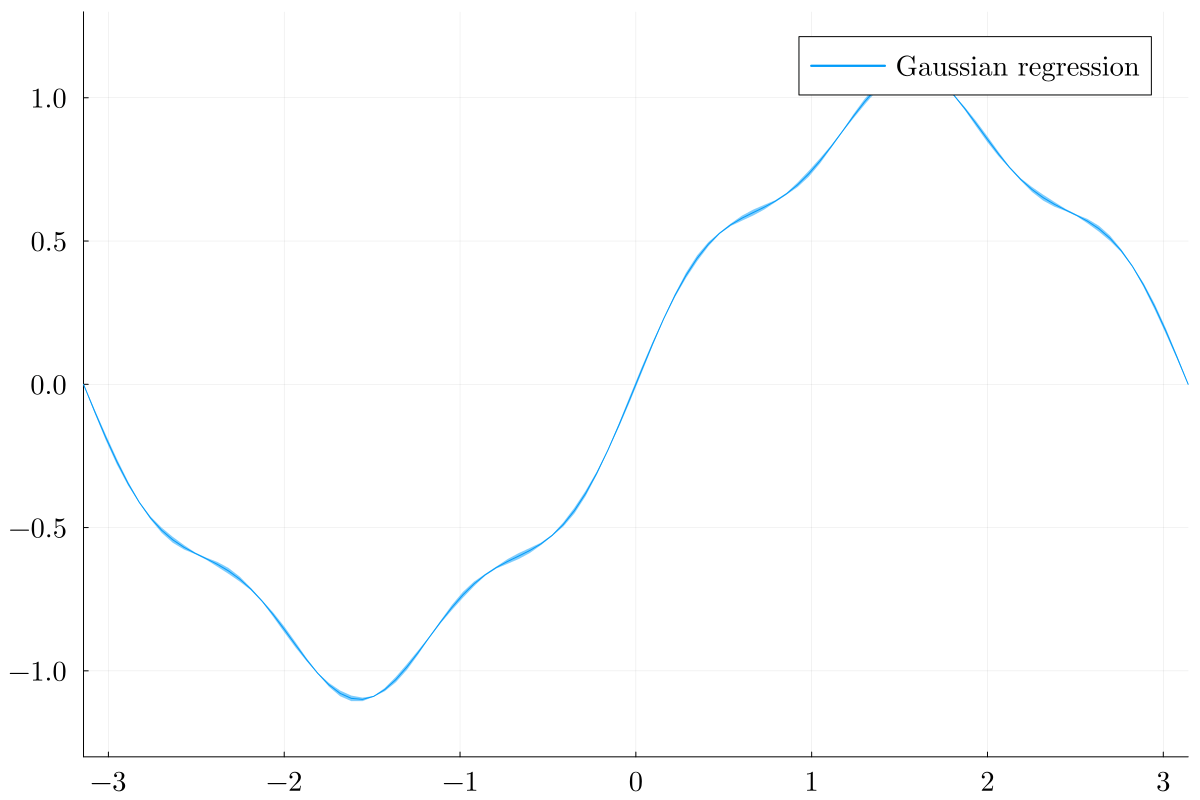

In [1]:
using Symbolics
using Plots
import LinearAlgebra as la
 
# Defaults for plots
Plots.default(fontfamily="Computer Modern",
               titlefontsize=32,
               xlabelfontsize=18,
               ylabelfontsize=18,
               legendfontsize=18,
               xtickfontsize=18,
               ytickfontsize=18)
 
 @variables x, y, s, t
 
# Prior distribution
const ℓ = .4
const τ = .4

# Kernel: periodic in x, square exponential in t
kernel = exp(- 2*sin((x - y) / 2)^2 / ℓ^2 - (t - s)^2 / 2τ^2)

u = 1    # Velocity
α = .05  # Diffusivity

∂ = Symbolics.derivative
L1(f) = ∂(f, t) + u*∂(f, x) - α*∂(∂(f, x), x)
L2(f) = ∂(f, s) + u*∂(f, y) - α*∂(∂(f, y), y)
 
k = Symbolics.build_function(kernel, [x, t], [y, s]; expression = false)
Lk = Symbolics.build_function(L1(kernel), [x, t], [y, s]; expression = false)
LkL = Symbolics.build_function(L1(L2(kernel)), [x, t], [y, s]; expression = false)

# We denote z = [x, t]
m(z) = 0
rhs(z) = 0

# Conditioning on PDE
# -------------------

σ_pde = 1e-3
Xs = LinRange(-π, π, 20)
Ts = LinRange(0, π, 20)
Zs = vcat([[[x, t] for x in Xs] for t in Ts]...)
mZ = m.(Zs)
rhsZ = rhs.(Zs)
LkLZZ = LkL.(Zs, Zs')
inv_mat_pde = inv(LkLZZ + σ_pde^2*la.I(length(Zs)))
mpde(z) = m(z) + Lk.(Zs, [z])'inv_mat_pde*(rhsZ - mZ)
kpde(z, w) = k(z, w) - Lk.(Zs, [z])'inv_mat_pde*Lk.(Zs, [w])
 
# Conditioning on initial condition : f(x, 0) = ic(x)
# ---------------------------------------------------
 
ic(x) = sin(x) + .1sin(5x)
# ic(x) = sign(x)
σ_ic = 1e-3
Zic = [[x, 0] for x in LinRange(-π, π, 20)]
condition = [ic(z[1]) for z in Zic]
mZic = mpde.(Zic)
kZZic = kpde.(Zic, Zic')
inv_mat_ic = inv(kZZic + σ_ic^2*la.I(length(Zic)))
mpost(z) = mpde(z) + kpde.(Zic, [z])'inv_mat_ic*(condition - mZic)
kpost(z, w) = kpde(z, w) - kpde.(Zic, [z])'inv_mat_ic*kpde.(Zic, [w])

# Visualization
# -------------

ts = LinRange(0, π, 100)
xs = LinRange(-π, π, 100)

anim = @animate for t in ts
    println(t)
    zs = [[x, t] for x in xs]
    Plots.plot(xs, mpost.(zs), label="Gaussian regression", ribbon = sqrt.(kpost.(zs, zs)))
    Plots.plot!(xlims = (-π, π), ylims=(-1.3, 1.3))
    Plots.plot!(size=(1200, 800), legend=:topright)
end
gif(anim, "advection_diffusion.gif", fps=10)
